In [1]:
!curl https://commondatastorage.googleapis.com/books1000/notMNIST_large.tar.gz --output data.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  235M  100  235M    0     0  19.3M      0  0:00:12  0:00:12 --:--:-- 30.1M


In [0]:
!tar xf data.tar.gz

In [3]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import cv2 
PATH = './notMNIST_large'
IMAGE_SIZE=(28, 28)
filenames = []
categories = []

for letter in os.listdir(PATH):
    files = os.listdir(os.path.join(PATH, letter))
    length = len(files)
  
    for f in files:  
       image = cv2.imread(os.path.join(PATH, letter, f))
       if image is not None:
        filenames.append(os.path.join(letter, f))
       else:
         length -= 1
    categories += [letter]*length
    
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

train_df, validate_df = train_test_split(df, test_size=0.4, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

datagen = ImageDataGenerator(
    rescale=1./255, 
)


total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=256
train_generator = datagen.flow_from_dataframe(
    train_df,
    PATH,
    color_mode='grayscale',
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)
validation_generator = datagen.flow_from_dataframe(
    validate_df,
    PATH,
    color_mode='grayscale',
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Using TensorFlow backend.


Found 317468 validated image filenames belonging to 10 classes.
Found 211646 validated image filenames belonging to 10 classes.


In [10]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.layers import Dropout
from keras.regularizers import l2
from keras.optimizers import SGD
from keras import regularizers
import numpy as np
from keras.utils import np_utils

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu', 
                 input_shape=(28, 28, 1), kernel_regularizer=l2(0.003)))
model.add(Conv2D(16, (3, 3), activation='relu',  kernel_regularizer=l2(0.003)))
model.add(Flatten())
model.add(Dense(32, activation='relu',  kernel_regularizer=l2(0.003)))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 16)        4624      
_________________________________________________________________
flatten_6 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                294944    
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                330       
Total params: 300,218
Trainable params: 300,218
Non-trainable params: 0
________________________________________________

In [11]:
history = model.fit_generator(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
)

Epoch 1/15
1240/1240 [==============================] - 96s 77ms/step - loss: 0.7893 - accuracy: 0.8014 - val_loss: 0.6254 - val_accuracy: 0.8721
Epoch 2/15
1240/1240 [==============================] - 89s 72ms/step - loss: 0.6429 - accuracy: 0.8404 - val_loss: 0.6101 - val_accuracy: 0.8753
Epoch 3/15
1240/1240 [==============================] - 90s 72ms/step - loss: 0.6254 - accuracy: 0.8439 - val_loss: 0.4736 - val_accuracy: 0.8767
Epoch 4/15
1240/1240 [==============================] - 90s 72ms/step - loss: 0.6149 - accuracy: 0.8470 - val_loss: 0.5701 - val_accuracy: 0.8758
Epoch 5/15
1240/1240 [==============================] - 91s 73ms/step - loss: 0.6074 - accuracy: 0.8482 - val_loss: 0.5555 - val_accuracy: 0.8789
Epoch 6/15
1240/1240 [==============================] - 90s 73ms/step - loss: 0.5995 - accuracy: 0.8508 - val_loss: 0.5478 - val_accuracy: 0.8773
Epoch 7/15
1240/1240 [==============================] - 91s 73ms/step - loss: 0.5928 - accuracy: 0.8534 - val_loss: 0.4949 -

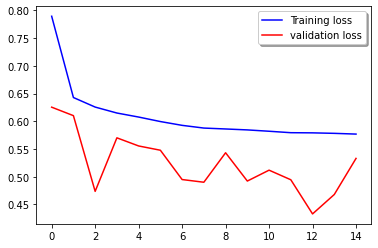

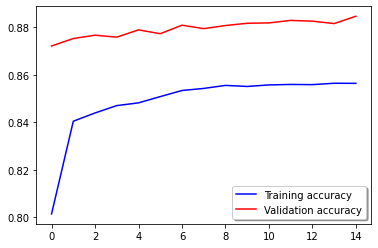

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(history.history['loss'], color='b', label="Training loss", )
plt.plot(history.history['val_loss'], color='r', label="validation loss")
legend = plt.legend(loc='best', shadow=True)
plt.show()

plt.plot(history.history['accuracy'], color='b', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = plt.legend(loc='best', shadow=True)
plt.show()

In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu', 
                 input_shape=(28, 28, 1), kernel_regularizer=l2(0.003)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(32, activation='relu',  kernel_regularizer=l2(0.003)))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)                173088    
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
________________________________________________

In [14]:
history = model.fit_generator(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
)

Epoch 1/10
1240/1240 [==============================] - 85s 69ms/step - loss: 0.8351 - accuracy: 0.7884 - val_loss: 0.6027 - val_accuracy: 0.8656
Epoch 2/10
1240/1240 [==============================] - 84s 68ms/step - loss: 0.6751 - accuracy: 0.8323 - val_loss: 0.5440 - val_accuracy: 0.8648
Epoch 3/10
1240/1240 [==============================] - 84s 68ms/step - loss: 0.6392 - accuracy: 0.8399 - val_loss: 0.5439 - val_accuracy: 0.8755
Epoch 4/10
1240/1240 [==============================] - 85s 69ms/step - loss: 0.6203 - accuracy: 0.8430 - val_loss: 0.5706 - val_accuracy: 0.8775
Epoch 5/10
1240/1240 [==============================] - 85s 68ms/step - loss: 0.6095 - accuracy: 0.8455 - val_loss: 0.5338 - val_accuracy: 0.8783
Epoch 6/10
1240/1240 [==============================] - 86s 69ms/step - loss: 0.6000 - accuracy: 0.8466 - val_loss: 0.4702 - val_accuracy: 0.8773
Epoch 7/10
1240/1240 [==============================] - 87s 70ms/step - loss: 0.5926 - accuracy: 0.8484 - val_loss: 0.5364 -

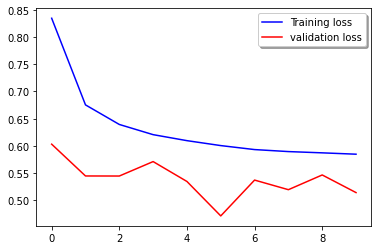

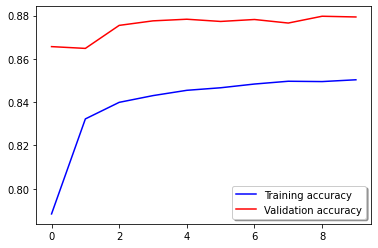

In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(history.history['loss'], color='b', label="Training loss", )
plt.plot(history.history['val_loss'], color='r', label="validation loss")
legend = plt.legend(loc='best', shadow=True)
plt.show()

plt.plot(history.history['accuracy'], color='b', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = plt.legend(loc='best', shadow=True)
plt.show()

In [20]:
import keras
from keras import layers
model = keras.Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))

model.add(layers.Dense(units=84, activation='relu'))

model.add(layers.Dense(units=10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d_3 (Average (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 16)        880       
_________________________________________________________________
average_pooling2d_4 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_17 (Dense)             (None, 84)              

In [21]:
history = model.fit_generator(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
)

Epoch 1/10
1240/1240 [==============================] - 85s 68ms/step - loss: 0.6210 - accuracy: 0.8147 - val_loss: 0.3721 - val_accuracy: 0.8690
Epoch 2/10
1240/1240 [==============================] - 84s 68ms/step - loss: 0.4064 - accuracy: 0.8760 - val_loss: 0.2572 - val_accuracy: 0.8845
Epoch 3/10
1240/1240 [==============================] - 84s 68ms/step - loss: 0.3605 - accuracy: 0.8896 - val_loss: 0.3255 - val_accuracy: 0.8934
Epoch 4/10
1240/1240 [==============================] - 83s 67ms/step - loss: 0.3322 - accuracy: 0.8987 - val_loss: 0.3201 - val_accuracy: 0.8990
Epoch 5/10
1240/1240 [==============================] - 83s 67ms/step - loss: 0.3134 - accuracy: 0.9039 - val_loss: 0.4106 - val_accuracy: 0.9026
Epoch 6/10
1240/1240 [==============================] - 83s 67ms/step - loss: 0.2981 - accuracy: 0.9083 - val_loss: 0.3061 - val_accuracy: 0.9036
Epoch 7/10
1240/1240 [==============================] - 85s 68ms/step - loss: 0.2858 - accuracy: 0.9121 - val_loss: 0.3091 -

In [22]:
history = model.fit_generator(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
)

Epoch 1/10
1240/1240 [==============================] - 84s 68ms/step - loss: 0.2520 - accuracy: 0.9217 - val_loss: 0.2224 - val_accuracy: 0.9137
Epoch 2/10
1240/1240 [==============================] - 83s 67ms/step - loss: 0.2459 - accuracy: 0.9231 - val_loss: 0.2669 - val_accuracy: 0.9131
Epoch 3/10
1240/1240 [==============================] - 84s 68ms/step - loss: 0.2402 - accuracy: 0.9248 - val_loss: 0.3446 - val_accuracy: 0.9135
Epoch 4/10
1198/1240 [===========================>..] - ETA: 1s - loss: 0.2349 - accuracy: 0.9265

KeyboardInterrupt: ignored

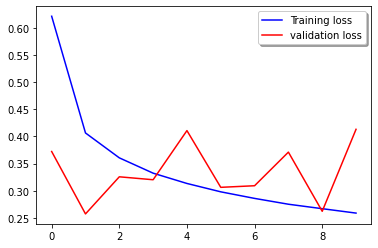

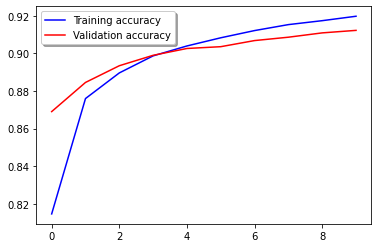

In [23]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(history.history['loss'], color='b', label="Training loss", )
plt.plot(history.history['val_loss'], color='r', label="validation loss")
legend = plt.legend(loc='best', shadow=True)
plt.show()

plt.plot(history.history['accuracy'], color='b', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = plt.legend(loc='best', shadow=True)
plt.show()